### Student Information
Name:鄭竹淇

Student ID:109020032

GitHub ID:gigi-igig

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__.

#import package

In [1]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import nltk
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
from sklearn.preprocessing import binarize
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import make_classification
from sklearn.naive_bayes import MultinomialNB
from mpl_toolkits.mplot3d import axes3d

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
#from colab
import sys
from google.colab import drive
drive.mount('/content/drive')
sys.path.append('/content/drive//My Drive/data mining/DM2023-Lab1-Master-main')
import helpers.data_mining_helpers as dmh

Mounted at /content/drive


# Take home

In [3]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories,shuffle=True, random_state=42)
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

## Exercise 2 (take home)
 Experiment with other querying techniques using pandas dataframes. Refer to their documentation for more information.

In [4]:
np.where(X["category"]==0)

(array([  12,   13,   17,   19,   21,   36,   37,   38,   41,   45,   52,
          53,   58,   60,   67,   72,   74,   78,   86,   90,   95,   99,
         100,  102,  105,  108,  119,  120,  122,  125,  128,  129,  130,
         140,  153,  154,  158,  164,  165,  169,  178,  187,  190,  194,
         197,  210,  211,  219,  234,  236,  242,  245,  250,  253,  254,
         258,  259,  265,  273,  276,  288,  290,  291,  296,  300,  305,
         308,  311,  317,  319,  326,  328,  345,  346,  348,  354,  365,
         381,  386,  388,  395,  396,  403,  407,  416,  421,  423,  425,
         426,  430,  431,  437,  441,  446,  451,  455,  456,  464,  465,
         470,  474,  475,  478,  481,  488,  500,  504,  507,  516,  520,
         523,  525,  530,  535,  539,  548,  549,  552,  553,  569,  573,
         576,  579,  584,  586,  589,  592,  597,  600,  603,  607,  615,
         617,  632,  634,  638,  648,  652,  654,  664,  666,  670,  674,
         682,  685,  697,  700,  704, 

## Exercise 5 (take home)
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [5]:
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },{ 'id': 'B'},{ 'id': 'C', 'missing_example': 'NaN'  },{ 'id': 'D', 'missing_example': 'None' },{ 'id': 'E', 'missing_example':  None  },{ 'id': 'F', 'missing_example': ''     }]
NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
display(NA_df)
NA_df['missing_example'].isnull()

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [6]:
#isnull() will check None or numpy.NaN, empty strings '' or numpy.inf are not considered NA values
#A:True, because "missing_example" is np.nan.
#B:True, because "missing_example" didn't have value.
#C:False, because "missing_example"="NaN", which is a string.
#D:True, because "missing_example"="None", whcih is an object.
#E:False, because "missing_example"=''

## Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [7]:
X_sample = X.sample(n=1000,random_state=42) #random state
display(X[0:1])
display(X_sample[0:1])

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics


,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med


In [8]:
print("X.loc[561].name: ",X.loc[561].name, " VS X_sample.loc[561].name: ", X_sample.loc[561].name)
print("X.iloc[561].name:",X.iloc[561].name," VS X_sample.iloc[561].name:", X_sample.iloc[561].name)

X.loc[561].name:  561  VS X_sample.loc[561].name:  561
X.iloc[561].name: 561  VS X_sample.iloc[561].name: 786


In [9]:
#X_sample index didn't start from 0.
#loc() function is the same,
#but iloc() function is different, because iloc() is query by new index(not orignal one)

##Exercise 8 (take home):
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for.

sci.med                   277
soc.religion.christian    270
comp.graphics             247
alt.atheism               206
Name: category_name, dtype: int64

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64

,X,X_sample
soc.religion.christian,599,270
sci.med,594,277
comp.graphics,584,247
alt.atheism,480,206


<Axes: title={'center': 'Category distribution'}>

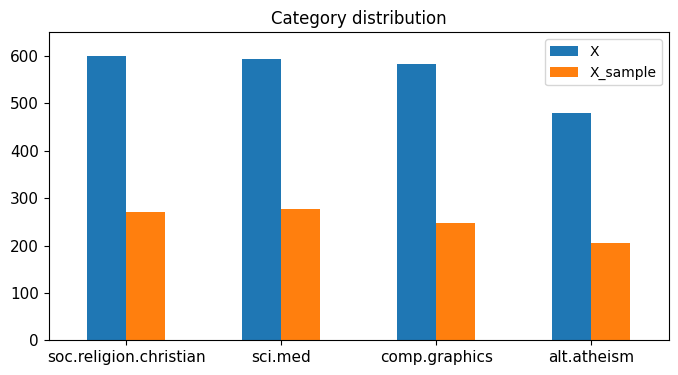

In [10]:
l1=X_sample.category_name.value_counts()
l2=X.category_name.value_counts()
display(l1,l2)
df = pd.concat([l2,l1], axis=1, join="inner")
df.columns = ['X', 'X_sample']
display(df)
df.plot(kind = 'bar', title = 'Category distribution', ylim = [0, 650], rot = 0, fontsize = 11, figsize = (8,4))

##Exercise 10 (take home):
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [11]:
# Answer here
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
id_array=np.where(X_counts[4, 0:100].toarray()[0]==1)[0]
#id_array[1]=37, second 1 is on [4][37]
print(count_vect.get_feature_names_out()[id_array][1])

01


## Exercise 11 (take home):
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

[ 4903  4992 12626 32142 32493 34368 35057 35638]
['amjad' 'and' 'edu' 'the' 'to' 'virtual' 'will' 'you']


,amjad,and,edu,the,to,virtual,will,you
doc_0,0,0,0,5,4,0,0,0
doc_1,0,0,1,11,4,0,0,0
doc_2,0,9,2,14,26,0,4,13
doc_3,0,1,0,6,0,0,0,0
doc_4,0,3,2,10,8,0,0,1
doc_5,0,7,2,12,14,0,0,0
doc_6,0,7,2,3,8,0,0,0
doc_7,0,9,0,21,11,0,5,0
doc_8,0,5,6,6,6,0,0,1
doc_9,0,23,2,10,21,0,0,5


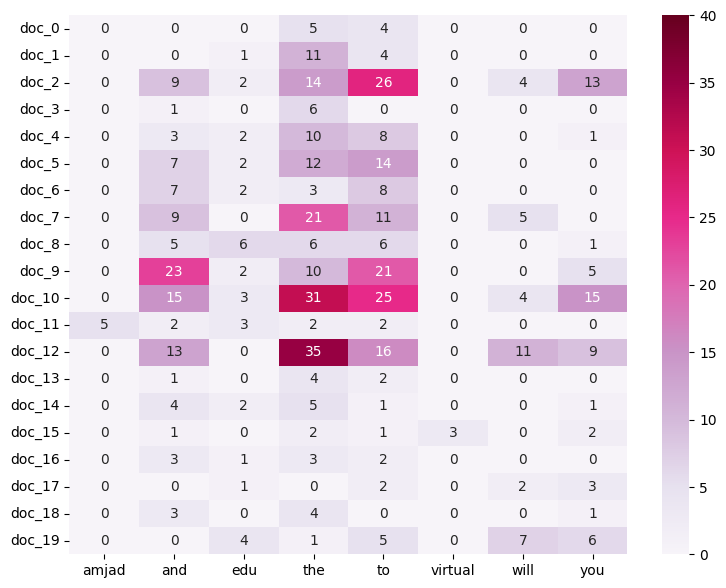

In [12]:
# Answer here
freq_m=X_counts.argmax(axis=1)[0:20]
freq_most=np.unique(freq_m, axis=0).squeeze()
print(freq_most)
freq_name=count_vect.get_feature_names_out()[freq_most]
print(freq_name)
plot_z=X_counts[0:20, freq_most].toarray()
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
df_todraw = pd.DataFrame(plot_z, columns = freq_name, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,cmap="PuRd",vmin=0, vmax=40, annot=True)

## Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [13]:
#example
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
print(X_reduced.shape)

(2257, 2)


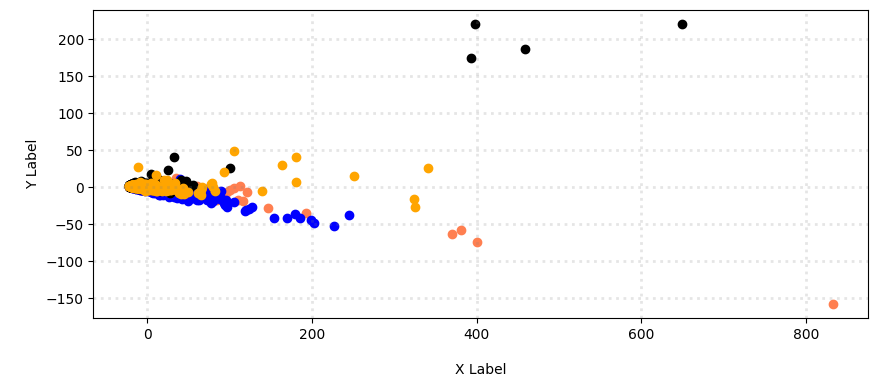

In [14]:
col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (10,4))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [15]:
# Answer here
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
print(X_reduced.shape)
col = ['coral', 'blue', 'black', 'orange']

(2257, 3)


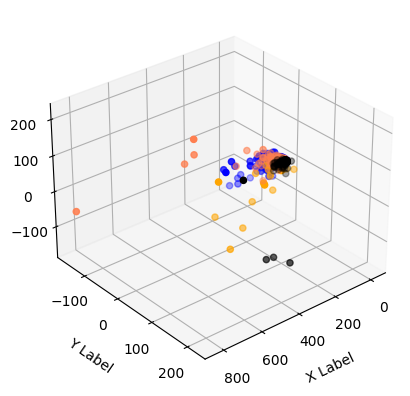

In [16]:
# plot
ax = plt.axes(projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter3D(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
#change angle
ax.view_init(30, 50)
plt.show()

##Exercise 13 (take home):
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

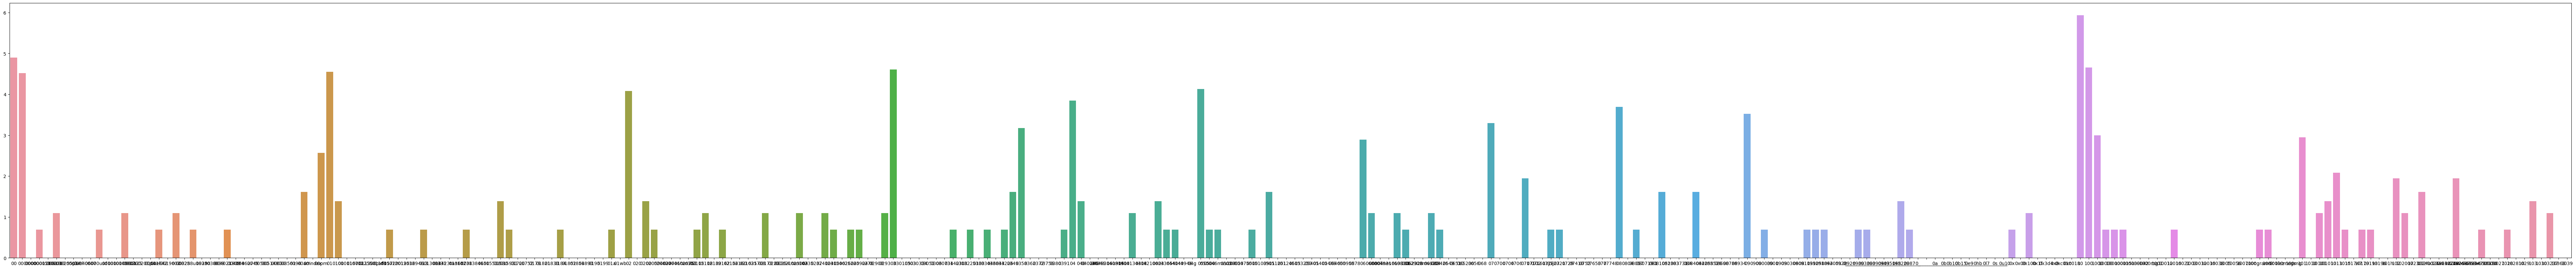

In [17]:
# Answer here
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], y=[math.log(x) for x in term_frequencies[:300]])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 0, fontsize=10);

## Exercise 14 (take home):
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.


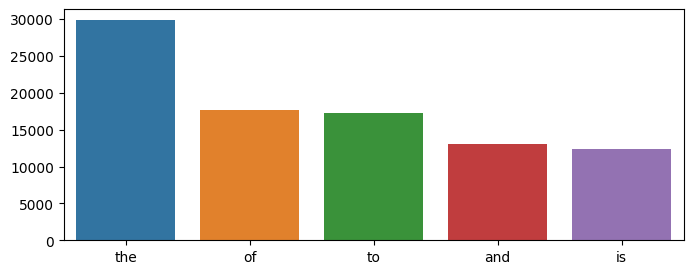

In [18]:
# Answer here
max_freq_id=np.argsort(-term_frequencies)[:5]
plt.subplots(figsize=(8, 3))
g = sns.barplot(x=count_vect.get_feature_names_out()[max_freq_id], y=term_frequencies[max_freq_id])
g.set_xticklabels(count_vect.get_feature_names_out()[max_freq_id], rotation = 0, fontsize=10);

##Exercise 15 (take home):
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

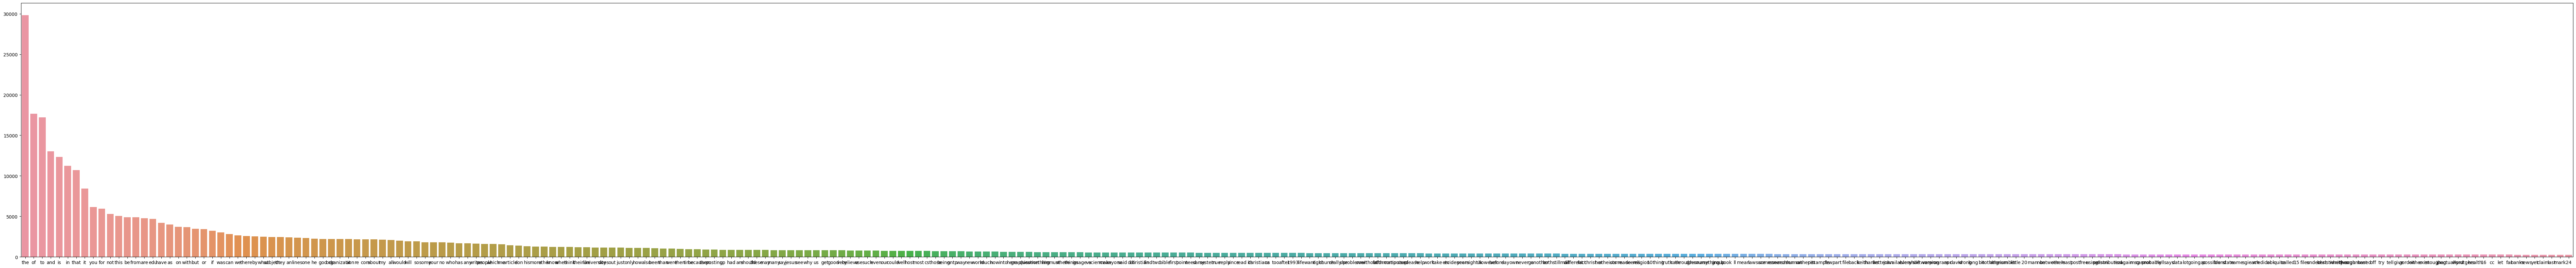

In [19]:
# Answer here
freq_id=np.argsort(-term_frequencies)[:300]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[freq_id], y=term_frequencies[freq_id])
g.set_xticklabels(count_vect.get_feature_names_out()[freq_id], rotation = 0, fontsize=10);

##Exercise 16 (take home):
Try to generate the binarization using the `category_name` column instead. Does it work?

In [20]:
#no, input of mlb.fit() function need be int type

# New dataset

##part2

###load data and merge(add column)

In [21]:
with open('/content/drive//My Drive/data mining/DM2023-Lab1-Master-main/Homework/yelp_labelled.txt') as f1:
  lines1=f1.readlines()
  f1.close()
with open('/content/drive//My Drive/data mining/DM2023-Lab1-Master-main/Homework/imdb_labelled.txt') as f2:
  lines2=f2.readlines()
  f2.close()
with open('/content/drive//My Drive/data mining/DM2023-Lab1-Master-main/Homework/amazon_cells_labelled.txt') as f3:
  lines3=f3.readlines()
  f3.close()

In [22]:
total_old=[]
for line in lines1:
  line=line.strip()
  line=line.split('\t',1)
  total_old.append([line[0],int(line[1]),"yelp",1])
for line in lines2:
  line=line.strip()
  line=line.split('\t',1)
  total_old.append([line[0],int(line[1]),"imdb",2])
for line in lines3:
  line=line.strip()
  line=line.split('\t',1)
  total_old.append([line[0],int(line[1]),"amazon_cells",3])

In [23]:
total_old=pd.DataFrame(total_old, columns=["text","score","label_name","label"])
display(total_old[2500:2550])

,text,score,label_name,label
2500,"The bose noise cancelling is amazing, which is...",1,amazon_cells,3
2501,This battery is an excellent bargain!,1,amazon_cells,3
2502,Defective crap.,0,amazon_cells,3
2503,I would have given no star if I was able.,0,amazon_cells,3
2504,I wear glasses and it fits fine with them.,1,amazon_cells,3
2505,The sound quality for the device is unacceptab...,0,amazon_cells,3
2506,I would not recommend this item to anyone.,0,amazon_cells,3
2507,The holster that arrived did not match the pho...,0,amazon_cells,3
2508,great...no problems at all!.,1,amazon_cells,3
2509,"As an earlier review noted, plug in this charg...",0,amazon_cells,3


In [24]:
print(len(total_old))
total_old[total_old['label_name']=='yelp'].iloc[::10][:5]

3000


,text,score,label_name,label
0,Wow... Loved this place.,1,yelp,1
10,Service was very prompt.,1,yelp,1
20,The Burrittos Blah!,0,yelp,1
30,"Also there are combos like a burger, fries, an...",1,yelp,1
40,The shrimp tender and moist.,1,yelp,1


###Missing value and Dupllicates value

In [25]:
display(total_old.isnull().apply(lambda x: dmh.check_missing_values(x)))

,text,score,label_name,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [26]:
display(sum(total_old.duplicated()))

17

In [27]:
display(total_old.groupby("score").label_name.value_counts().sort_index())
total_data=total_old.drop_duplicates(keep=False, inplace=False)
display(total_data.groupby("score").label_name.value_counts().sort_index())

score  label_name  
0      amazon_cells    500
       imdb            500
       yelp            500
1      amazon_cells    500
       imdb            500
       yelp            500
Name: label_name, dtype: int64

score  label_name  
0      amazon_cells    494
       imdb            498
       yelp            494
1      amazon_cells    486
       imdb            496
       yelp            498
Name: label_name, dtype: int64

In [28]:
print(type(total_data))

<class 'pandas.core.frame.DataFrame'>


###random

In [29]:
display(total_data)
total_data = total_data.sample(frac=1,random_state=42).reset_index(drop=True)
display(total_data)

,text,score,label_name,label
0,Wow... Loved this place.,1,yelp,1
1,Crust is not good.,0,yelp,1
2,Not tasty and the texture was just nasty.,0,yelp,1
3,Stopped by during the late May bank holiday of...,1,yelp,1
4,The selection on the menu was great and so wer...,1,yelp,1
...,...,...,...,...
2995,The screen does get smudged easily because it ...,0,amazon_cells,3
2996,What a piece of junk.. I lose more calls on th...,0,amazon_cells,3
2997,Item Does Not Match Picture.,0,amazon_cells,3
2998,The only thing that disappoint me is the infra...,0,amazon_cells,3


,text,score,label_name,label
0,The plastic breaks really easy on this clip.,0,amazon_cells,3
1,Mediocre food.,0,yelp,1
2,This is one of the worst Sandra Bullock movie ...,0,imdb,2
3,"We had fantastic service, and were pleased by ...",1,yelp,1
4,The case is great and works fine with the 680.,1,amazon_cells,3
...,...,...,...,...
2961,"The acting is fantastic, the stories are seaml...",1,imdb,2
2962,Too politically correct.,0,imdb,2
2963,These are the central themes of the film and t...,0,imdb,2
2964,"his performance, as awarded, was stunning.",1,imdb,2


###smapling

In [30]:
print(total_data.shape)
sample_data = total_data.sample(n=300,random_state=42).reset_index(names=['id_org']) #random state
display(sample_data)

(2966, 4)


,id_org,text,score,label_name,label
0,2395,"In summary, this was a largely disappointing d...",0,yelp,1
1,794,Pretty awesome place.,1,yelp,1
2,1894,Ray Charles is legendary.,1,imdb,2
3,332,I must say I have taped most of the episodes a...,1,imdb,2
4,2023,All in all an excellent restaurant highlighted...,1,yelp,1
...,...,...,...,...,...
295,1480,Go watch it!,1,imdb,2
296,1674,"I won't spoil it, but the ending in pretty ama...",1,imdb,2
297,1236,I guess I liked the details of his dysfunction...,1,imdb,2
298,402,Go To Place for Gyros.,1,yelp,1


<Axes: title={'center': 'Category distribution'}>

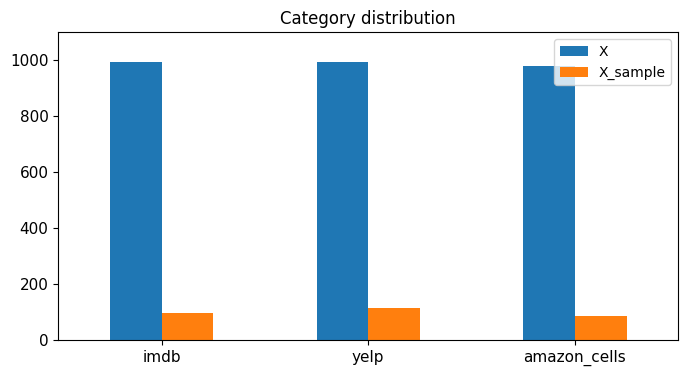

In [31]:
df = pd.concat([ total_data.label_name.value_counts() , sample_data.label_name.value_counts()], axis=1, join="inner")
df.columns = ['X', 'X_sample']
df.plot(kind = 'bar', title = 'Category distribution', ylim = [0, 1100], rot = 0, fontsize = 11, figsize = (8,4))

###data preprocessing

####feature create

In [32]:
total_data['unigrams'] = total_data['text'].apply(lambda x: dmh.tokenize_text(x))

In [33]:
display(total_data[:3])

,text,score,label_name,label,unigrams
0,The plastic breaks really easy on this clip.,0,amazon_cells,3,"[The, plastic, breaks, really, easy, on, this,..."
1,Mediocre food.,0,yelp,1,"[Mediocre, food, .]"
2,This is one of the worst Sandra Bullock movie ...,0,imdb,2,"[This, is, one, of, the, worst, Sandra, Bulloc..."


In [34]:
count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(total_data.text) #learn the vocabulary and return document-term matrix
analyze = count_vect.build_analyzer()

In [35]:
print(data_counts.shape)
print(data_counts[1], "FINISH!\n")
count_vect.get_feature_names_out()[10]

(2966, 5153)
  (0, 2825)	1
  (0, 1821)	1 FINISH!



'18'

In [36]:
display(total_data.loc[2].text)
analyze(total_data.loc[2].text)

'This is one of the worst Sandra Bullock movie since Speed 2 But not quite that bad.  '

['this',
 'is',
 'one',
 'of',
 'the',
 'worst',
 'sandra',
 'bullock',
 'movie',
 'since',
 'speed',
 'but',
 'not',
 'quite',
 'that',
 'bad']

####subset select

,term_00,term_10,term_100,term_11,term_12,term_13,term_15,term_15g,term_15pm,term_17,term_18,term_18th,term_1928,term_1947,term_1948,term_1949,term_1971,term_1973,term_1979,term_1980
doc_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


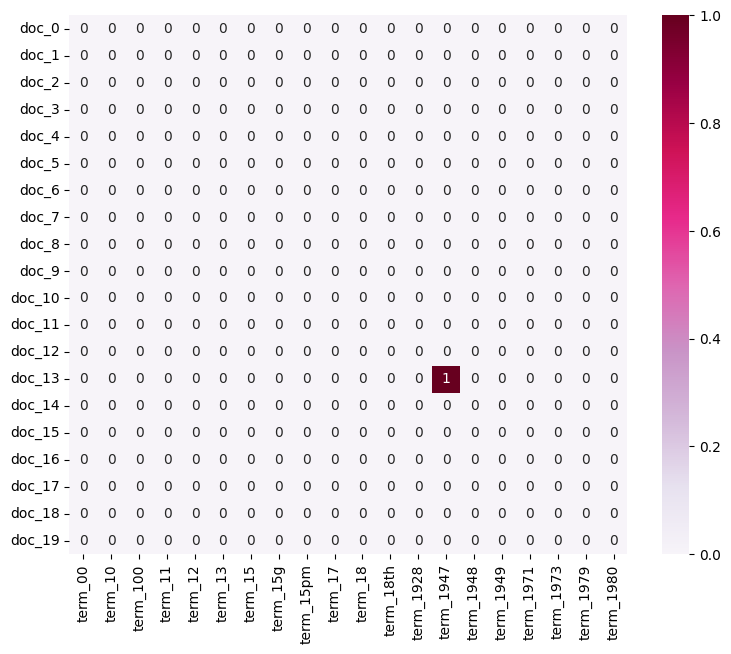

In [37]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(total_data.index)[0:20]]
plot_z = data_counts[0:20, 0:20].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,cmap="PuRd",vmin=0, vmax=1, annot=True)

####dimension reduce

In [38]:
labelnames=['yelp','imdb','amazon_cells']
col = ['black', 'blue', 'orange']
scores=[0,1]
col2=['blue', 'orange']

In [39]:
data_reduced = PCA(n_components = 2).fit_transform(data_counts.toarray())
print(data_reduced.shape)

(2966, 2)


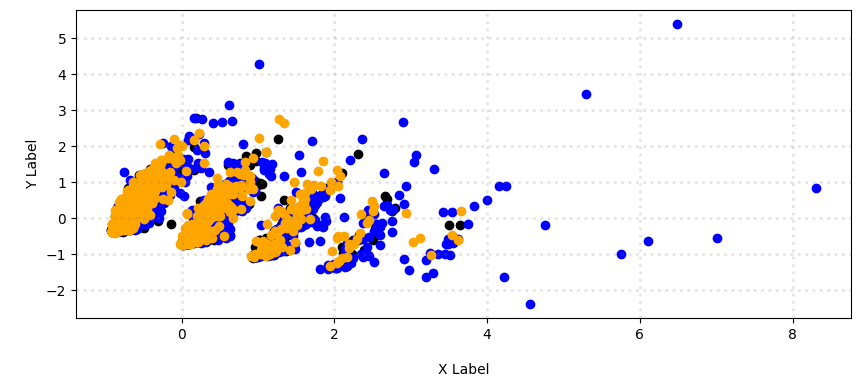

In [40]:
# plot
fig = plt.figure(figsize = (10,4))
ax = fig.subplots()

for c, labelname in zip(col, labelnames):
    xs = data_reduced[total_data['label_name'] == labelname].T[0]
    ys = data_reduced[total_data['label_name'] == labelname].T[1]
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
plt.show()

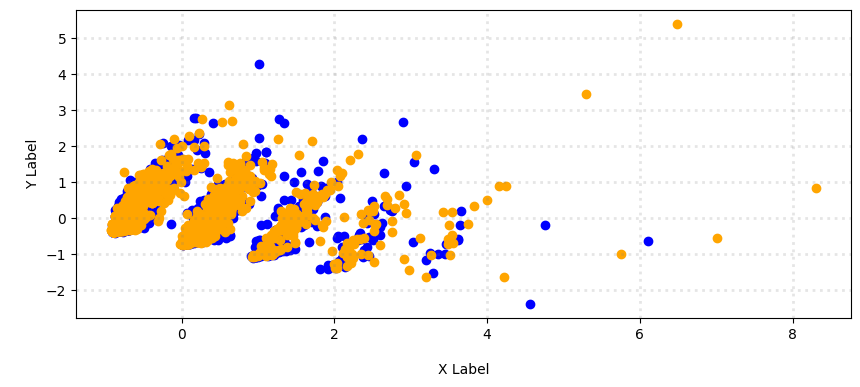

In [41]:
# plot
fig = plt.figure(figsize = (10,4))
ax = fig.subplots()

for c, score in zip(col2, scores):
    xs = data_reduced[total_data['score'] == score].T[0]
    ys = data_reduced[total_data['score'] == score].T[1]
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [42]:
data_reduced3d = PCA(n_components = 3).fit_transform(data_counts.toarray())
print(data_reduced3d.shape)

(2966, 3)


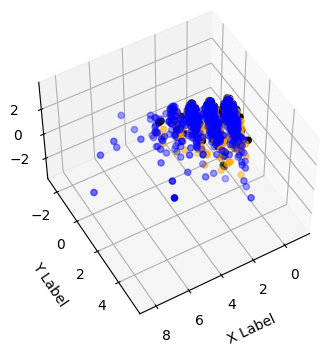

In [43]:
# plot
fig = plt.figure(figsize = (10,4))
ax = plt.axes(projection='3d')

for c, labelname in zip(col, labelnames):
    xs = data_reduced3d[total_data['label_name'] == labelname].T[0]
    ys = data_reduced3d[total_data['label_name'] == labelname].T[1]
    zs = data_reduced3d[total_data['label_name'] == labelname].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
#change angle
ax.view_init(50, 60)
plt.show()

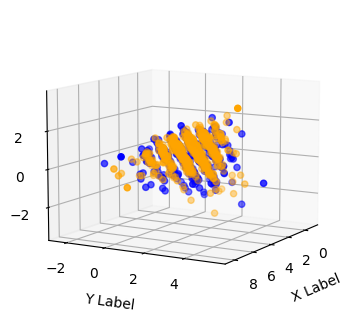

In [44]:
# plot
fig = plt.figure(figsize = (10,4))
ax = plt.axes(projection='3d')

for c, score in zip(col2, scores):
    xs = data_reduced3d[total_data['score'] == score].T[0]
    ys = data_reduced3d[total_data['score'] == score].T[1]
    zs = data_reduced3d[total_data['score'] == score].T[2]
    ax.scatter(xs, ys, zs, c =c , marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
#change angle
ax.view_init(10, 30)
plt.show()

####Aggregation(frequence of terms)

In [45]:
term_frequencies = np.asarray(data_counts.sum(axis=0))[0]

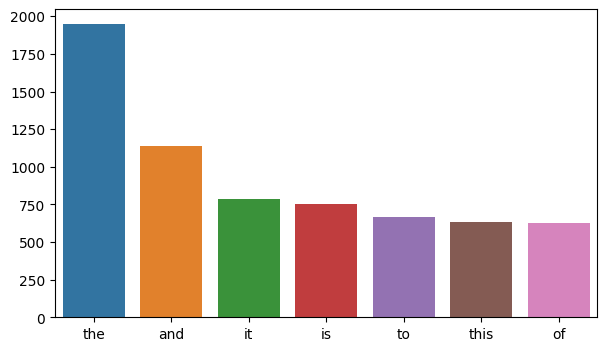

In [46]:
freq_id=np.argsort(-term_frequencies)[:7]
plt.subplots(figsize=(7, 4))
g = sns.barplot(x=count_vect.get_feature_names_out()[freq_id], y=term_frequencies[freq_id])
g.set_xticklabels(count_vect.get_feature_names_out()[freq_id], rotation = 0, fontsize=10);

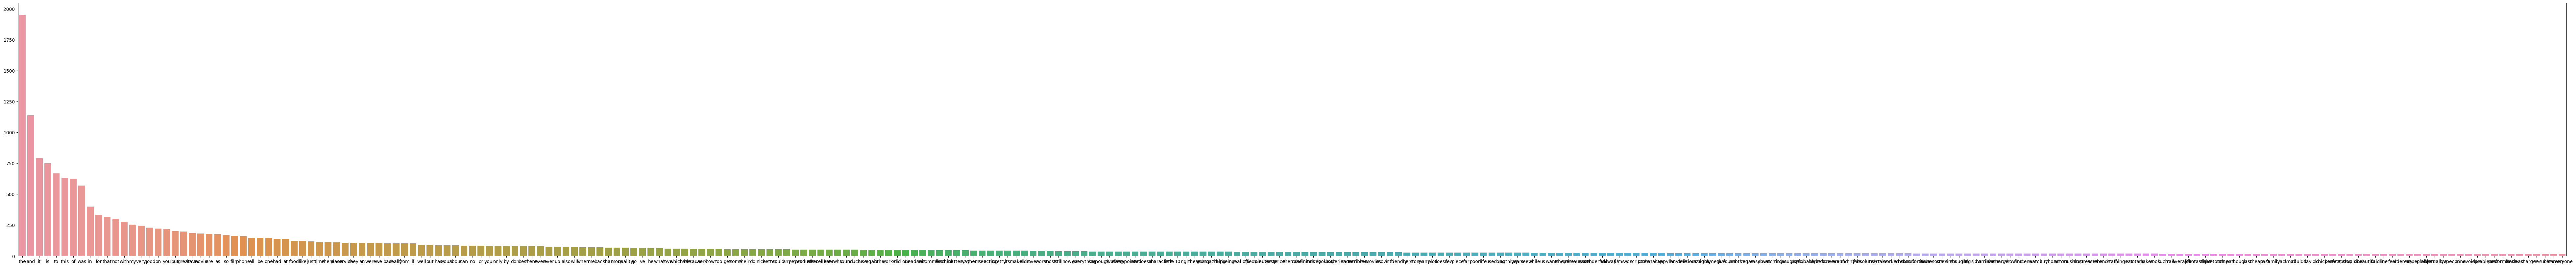

In [47]:
freq_id=np.argsort(-term_frequencies)[:300]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[freq_id], y=term_frequencies[freq_id])
g.set_xticklabels(count_vect.get_feature_names_out()[freq_id], rotation = 0, fontsize=10);

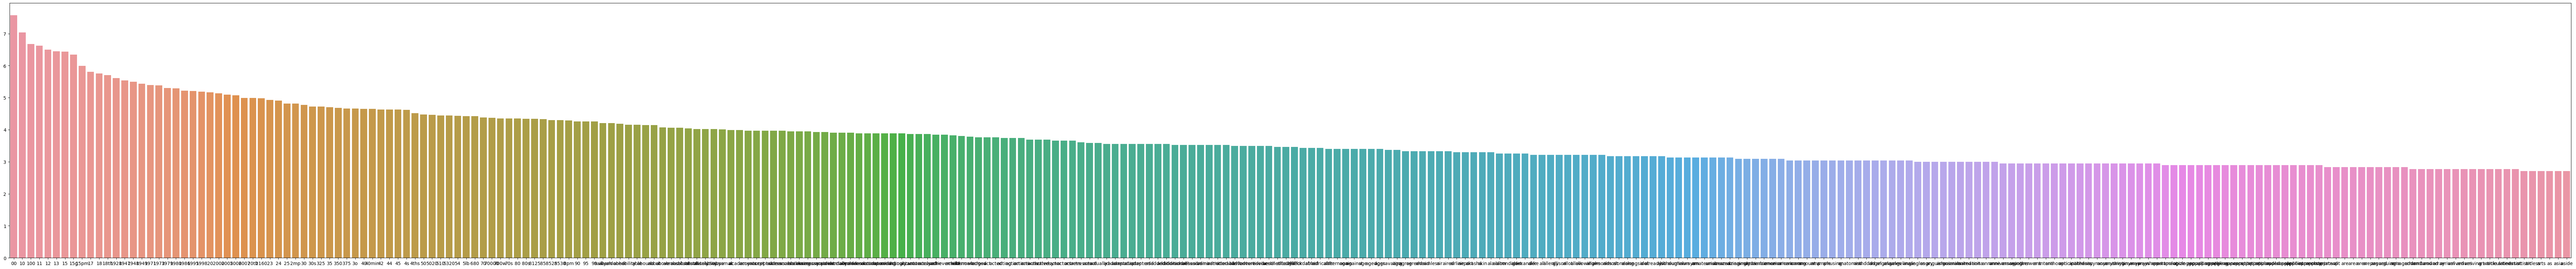

In [48]:
term_frequencies_log = [math.log(term_frequencies[i]) for i in freq_id]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], y=term_frequencies_log[:300])
#g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

####Discretization and Binarization

In [49]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(total_data.label)
total_data['bin_label'] = mlb.transform(total_data['label']).tolist()
display(total_data[0:5])

,text,score,label_name,label,unigrams,bin_label
0,The plastic breaks really easy on this clip.,0,amazon_cells,3,"[The, plastic, breaks, really, easy, on, this,...","[0, 0, 1]"
1,Mediocre food.,0,yelp,1,"[Mediocre, food, .]","[1, 0, 0]"
2,This is one of the worst Sandra Bullock movie ...,0,imdb,2,"[This, is, one, of, the, worst, Sandra, Bulloc...","[0, 1, 0]"
3,"We had fantastic service, and were pleased by ...",1,yelp,1,"[We, had, fantastic, service, ,, and, were, pl...","[1, 0, 0]"
4,The case is great and works fine with the 680.,1,amazon_cells,3,"[The, case, is, great, and, works, fine, with,...","[0, 0, 1]"


In [50]:
sample_data['bin_label'] = mlb.transform(sample_data['label']).tolist()
display(sample_data[:5])

,id_org,text,score,label_name,label,bin_label
0,2395,"In summary, this was a largely disappointing d...",0,yelp,1,"[1, 0, 0]"
1,794,Pretty awesome place.,1,yelp,1,"[1, 0, 0]"
2,1894,Ray Charles is legendary.,1,imdb,2,"[0, 1, 0]"
3,332,I must say I have taped most of the episodes a...,1,imdb,2,"[0, 1, 0]"
4,2023,All in all an excellent restaurant highlighted...,1,yelp,1,"[1, 0, 0]"


###data exploration

In [51]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = total_data.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = total_data.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = total_data.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [52]:
# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [53]:
# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.094491
Cosine Similarity using count bw 1 and 3: 0.273861
Cosine Similarity using count bw 2 and 3: 0.069007
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


##part3

###sample distribution

In [54]:
s_a=sample_data.groupby('score').label_name.value_counts().sort_index()
t_a=total_data.groupby('score').label_name.value_counts().sort_index()
display("total_data:",t_a, "sample_data:",s_a)
# Answer here

'total_data:'

score  label_name  
0      amazon_cells    494
       imdb            498
       yelp            494
1      amazon_cells    486
       imdb            496
       yelp            498
Name: label_name, dtype: int64

'sample_data:'

score  label_name  
0      amazon_cells    44
       imdb            48
       yelp            55
1      amazon_cells    43
       imdb            50
       yelp            60
Name: label_name, dtype: int64

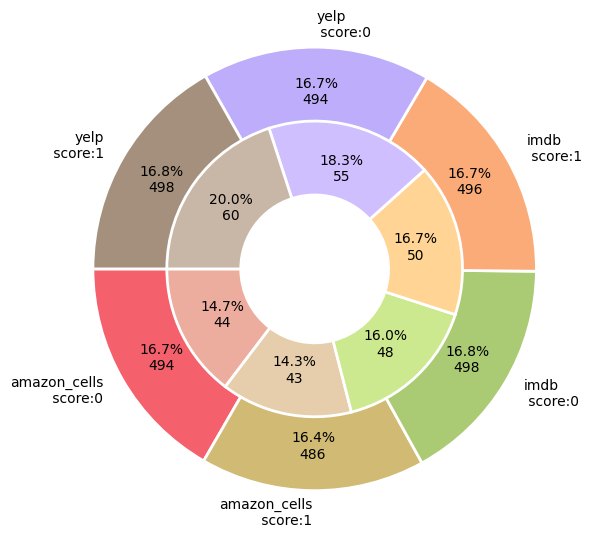

In [55]:
t_a_list = [t_a[0][0], t_a[1][0], t_a[0][1], t_a[1][1], t_a[0][2], t_a[1][2]]
s_a_list = [s_a[0][0], s_a[1][0], s_a[0][1], s_a[1][1], s_a[0][2], s_a[1][2]]
c1 = ['#F4606c','#D1BA74','#AACB73','#FAAB78','#BEADFA','#A4907C']
c2 = ['#ECAD9E','#E6CEAC','#CDE990','#FFD495','#D0BFFF','#C8B6A6']
plt.pie(t_a_list, radius=1.5, labels=["amazon_cells\n score:0","amazon_cells\n score:1","imdb\n score:0","imdb\n score:1","yelp\n score:0","yelp\n score:1"],
        labeldistance=1.1, colors=c1, startangle=180, autopct=(lambda i: f'{i:.1f}%\n{round(i/100*sum(t_a_list))}'),pctdistance=0.8,
        wedgeprops={'linewidth':2,'edgecolor':'w','width':1})
plt.pie(s_a_list, radius=1, colors=c2, startangle=180, autopct=(lambda i: f'{i:.1f}%\n{round(i/100*sum(s_a_list))}'),pctdistance=0.7,
        wedgeprops={'linewidth':2,'edgecolor':'w','width':0.5})
plt.show()

小結論：sample 和 total dataset 對 score 的分佈幾乎一樣


###sample subset select

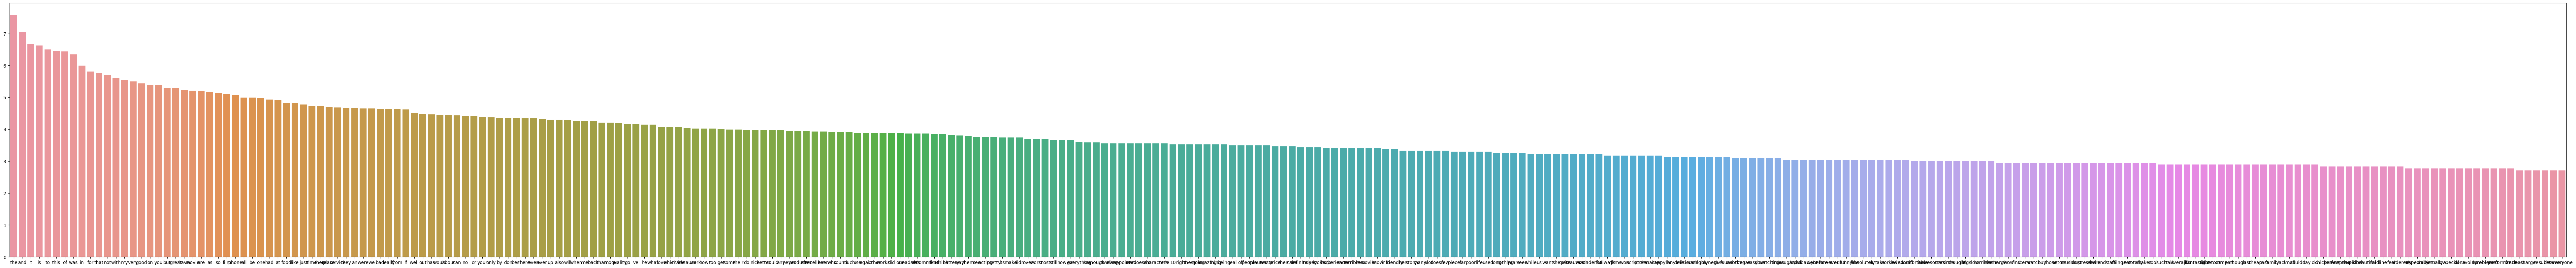

In [56]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[freq_id], y=[math.log(x) for x in term_frequencies[freq_id]])
g.set_xticklabels(count_vect.get_feature_names_out()[freq_id], rotation = 0, fontsize=10);

In [57]:
#display(sample_data[495:])
sample_counts=count_vect.transform(sample_data.text)
#print(data_counts[620,:],"finish\n",sample_counts[499,:])
print(data_counts.shape, sample_counts.shape)

(2966, 5153) (300, 5153)


In [58]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_freq = np.asarray(sample_counts.sum(axis=0))[0]
print(term_freq)
max_freq_id=np.argsort(-term_freq)
freq_name=count_vect.get_feature_names_out()[max_freq_id]
print(freq_name[:10])

[0 6 0 ... 0 0 0]
['the' 'and' 'it' 'is' 'was' 'of' 'to' 'this' 'in' 'that']


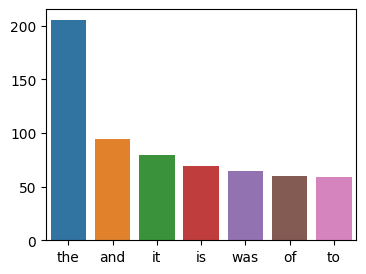

In [59]:
plt.subplots(figsize=(4, 3))
g = sns.barplot(x=freq_name[:7], y=term_freq[max_freq_id[:7]])
g.set_xticklabels(freq_name[:7], rotation = 0, fontsize=10);


###stopword

In [60]:
stopword=['about', 'also', 'am', 'and', 'an', 'are', 'at', 'as', 'be', 'been', 'but', 'by', 'can', 'even',
              'for', 'from', 'had', 'has', 'have', 'he', 'here', 'his', 'in','is', 'it',
              'just', 'me', 'my', 'not', 'no', 'of', 'on', 'one', 'or', 'so', 'that', 'the', 'there', 'they', 'this', 'to',
              'very', 'was', 'we', 'were', 'with', 'would', 'you', 'your']

In [61]:
stopword2=['about', 'also', 'am', 'and', 'an', 'are', 'at', 'as', 'be', 'been', 'by', 'can', 'even',
              'for', 'from', 'had', 'has', 'have', 'he', 'here', 'his', 'in','is', 'it',
              'just', 'me', 'my', 'of', 'on', 'one', 'or', 'so', 'that', 'the', 'there', 'they', 'this', 'to',
              'very', 'was', 'we', 'were', 'with', 'would', 'you', 'your']


['good' 'all' 'great' 'phone' 'place' 'food']


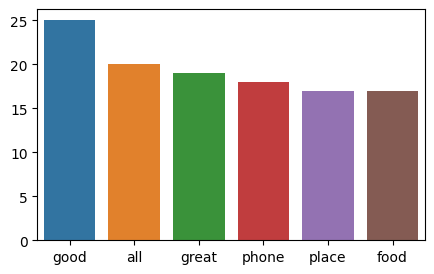

In [62]:
max_freq_id_update=[x for x in max_freq_id[:30] if count_vect.get_feature_names_out()[x] not in stopword]
freq_name_update=count_vect.get_feature_names_out()[max_freq_id_update]
print(freq_name_update)
plt.subplots(figsize=(5, 3))
g = sns.barplot(x=freq_name_update, y=term_freq[max_freq_id_update])
g.set_xticklabels(freq_name_update, rotation = 0, fontsize=10);

###subset select (label)


In [63]:
sample_y_id=[sample_data.index[(sample_data.label==1) & (sample_data.score==0)].tolist(),sample_data.index[(sample_data.label==1) & (sample_data.score==1)].tolist()]
sample_i_id=[sample_data.index[(sample_data.label==2) & (sample_data.score==0)].tolist(),sample_data.index[(sample_data.label==2) & (sample_data.score==1)].tolist()]
sample_a_id=[sample_data.index[(sample_data.label==3) & (sample_data.score==0)].tolist(),sample_data.index[(sample_data.label==3) & (sample_data.score==1)].tolist()]

['food', 'good', 'place', 'service', 'back', 'all', 'great', 'go', 'our']


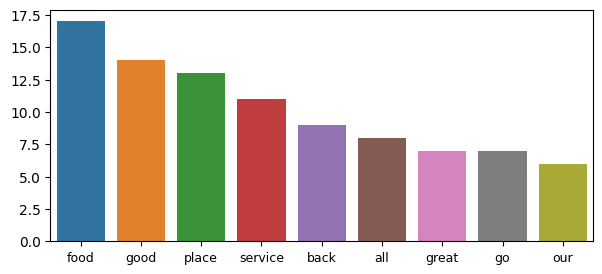

In [64]:
term_freq_y_0 = np.asarray(sample_counts[ sample_y_id[0] ,:].sum(axis=0))[0]
term_freq_y_1 = np.asarray(sample_counts[ sample_y_id[1] ,:].sum(axis=0))[0]
term_freq_y=np.add(term_freq_y_0,term_freq_y_1)
max_freq_id_y=np.argsort(-term_freq_y)
freq_name_y=count_vect.get_feature_names_out()[max_freq_id_y]
max_freq_id_update_y=[x for x in max_freq_id_y[:30] if count_vect.get_feature_names_out()[x] not in stopword]
freq_name_update_y=count_vect.get_feature_names_out()[max_freq_id_update_y].tolist()
print(freq_name_update_y)
plt.subplots(figsize=(7, 3))
g = sns.barplot(x=freq_name_update_y, y=term_freq_y[max_freq_id_update_y])
g.set_xticklabels(freq_name_update_y, rotation = 0, fontsize=9);

['film', 'movie', 'bad', 'characters', 'all', 'out', 'which', 'best', 'movies']


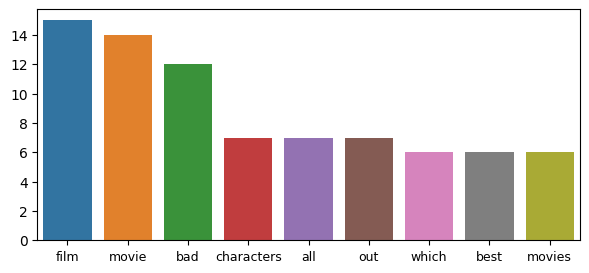

In [65]:
term_freq_i_0 = np.asarray(sample_counts[ sample_i_id[0] ,:].sum(axis=0))[0]
term_freq_i_1 = np.asarray(sample_counts[ sample_i_id[1] ,:].sum(axis=0))[0]
term_freq_i=np.add(term_freq_i_0,term_freq_i_1)
max_freq_id_i=np.argsort(-term_freq_i)
freq_name_i=count_vect.get_feature_names_out()[max_freq_id_i]
max_freq_id_update_i=[x for x in max_freq_id_i[:35] if count_vect.get_feature_names_out()[x] not in stopword]
freq_name_update_i=count_vect.get_feature_names_out()[max_freq_id_update_i].tolist()
print(freq_name_update_i)
plt.subplots(figsize=(7, 3))
g = sns.barplot(x=freq_name_update_i, y=term_freq_i[max_freq_id_update_i])
g.set_xticklabels(freq_name_update_i, rotation = 0, fontsize=9);

['phone', 'great', 'really', 'good', 'quality', 'if', 'sound', 'excellent', 'ear', 'all']


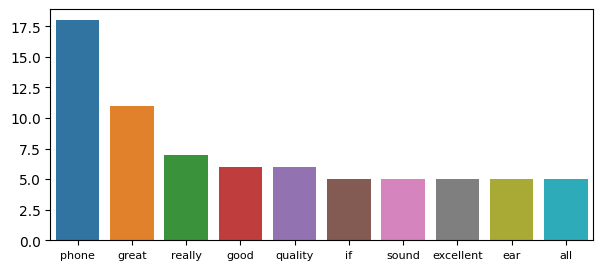

In [66]:
term_freq_a_0 = np.asarray(sample_counts[ sample_a_id[0] ,:].sum(axis=0))[0]
term_freq_a_1 = np.asarray(sample_counts[ sample_a_id[1] ,:].sum(axis=0))[0]
term_freq_a=np.add(term_freq_a_0,term_freq_a_1)
max_freq_id_a=np.argsort(-term_freq_a)
freq_name_a=count_vect.get_feature_names_out()[max_freq_id_a]
max_freq_id_update_a=[x for x in max_freq_id_a[:30] if count_vect.get_feature_names_out()[x] not in stopword]
freq_name_update_a=count_vect.get_feature_names_out()[max_freq_id_update_a].tolist()
print(freq_name_update_a)
plt.subplots(figsize=(7, 3))
g = sns.barplot(x=freq_name_update_a, y=term_freq_a[max_freq_id_update_a])
g.set_xticklabels(freq_name_update_a, rotation = 0, fontsize=8);

In [67]:
item_name=freq_name_update_y[0:5]+freq_name_update_i[0:5]+freq_name_update_a[0:5]
print(item_name)
item_name_id=max_freq_id_update_y[0:5]+max_freq_id_update_i[0:5]+max_freq_id_update_a[0:5]
print(item_name_id)

['food', 'good', 'place', 'service', 'back', 'film', 'movie', 'bad', 'characters', 'all', 'phone', 'great', 'really', 'good', 'quality']
[1821, 1992, 3349, 3992, 367, 1741, 2953, 373, 763, 179, 3320, 2022, 3624, 1992, 3566]


In [68]:
#because the domain of log >0, each frequence add one first.
y_0=[math.log(term_freq_y_0[i]+1) for i in item_name_id]
y_1=[math.log(term_freq_y_1[i]+1) for i in item_name_id]
i_0=[math.log(term_freq_i_0[i]+1) for i in item_name_id]
i_1=[math.log(term_freq_i_1[i]+1) for i in item_name_id]
a_0=[math.log(term_freq_a_0[i]+1) for i in item_name_id]
a_1=[math.log(term_freq_a_1[i]+1) for i in item_name_id]

plot_y=['yelp,score:0','yelp,score:1','imdb,score:0','imdb,score:1','amazon,score:0','amazon,score:1']
plot_z=[y_0,y_1,i_0,i_1,a_0,a_1]

df_todraw = pd.DataFrame(plot_z, columns = item_name, index = plot_y)

high frequence terms from sample: ['good' 'all' 'great' 'phone' 'place' 'food']


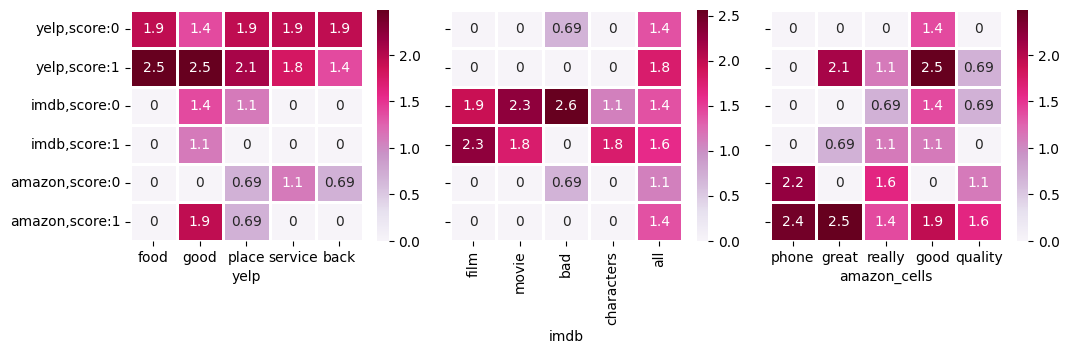

In [69]:
print("high frequence terms from sample:",freq_name_update)
fig, (yplt, iplt, aplt) = plt.subplots(ncols=3,figsize=(12, 3))
fig.subplots_adjust(wspace=0.1)
sns.heatmap(df_todraw.iloc[:,0:5], cmap="PuRd", ax=yplt, cbar=True, annot=True, linewidths=2)
sns.heatmap(df_todraw.iloc[:,5:10], cmap="PuRd", ax=iplt, cbar=True, annot=True, linewidths=2)
sns.heatmap(df_todraw.iloc[:,10:15], cmap="PuRd", ax=aplt, cbar=True, annot=True, linewidths=2)
iplt.set_yticklabels([])
aplt.set_yticklabels([])
yplt.set_xlabel("yelp")
iplt.set_xlabel("imdb")
aplt.set_xlabel("amazon_cells")
plt.show()

小結論:
From this heatmap, we found that ["food","service","back"] have higher frequence in yelp_data, ["film","movie","characters"] have higher frequence in imdb_data, ["phone"] has higher frequence in amazon_data, ["good","all"] have higher frequence in every database. It might because Yelp was a website about restaurants service, Imdb is a abbreviation from "Internet Movie Database", and Amazon is a online retailer.

###subset select (by score)

['not', 'bad', 'movie', 'but', 'because', 'place', 'no', 'out', 've', 'service']
[15 13  9  8  8  8  7  7  6  6]


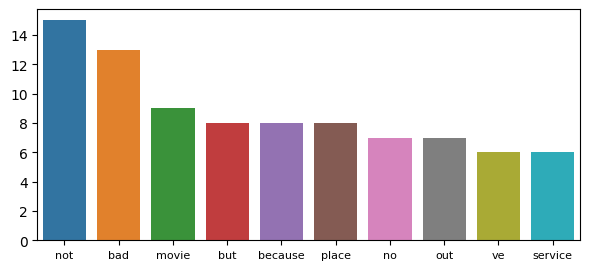

In [70]:
term_freq_0=np.add(term_freq_y_0,term_freq_i_0,term_freq_a_0)
max_freq_id_0=np.argsort(-term_freq_0)
freq_name_0=count_vect.get_feature_names_out()[max_freq_id_0]
max_freq_id_update_0=[x for x in max_freq_id_0[:30] if count_vect.get_feature_names_out()[x] not in stopword2]
freq_name_update_0=count_vect.get_feature_names_out()[max_freq_id_update_0].tolist()
print(freq_name_update_0)
print(term_freq_0[max_freq_id_update_0])
plt.subplots(figsize=(7, 3))
g = sns.barplot(x=freq_name_update_0, y=term_freq_0[max_freq_id_update_0])
g.set_xticklabels(freq_name_update_0, rotation = 0, fontsize=8);

['good', 'food', 'all', 'film', 'great', 'not', 'place']


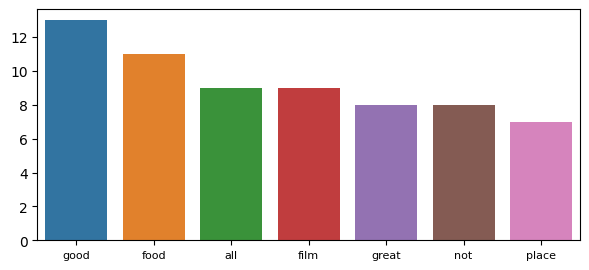

In [71]:
term_freq_1=np.add(term_freq_y_1,term_freq_i_1,term_freq_a_1)
max_freq_id_1=np.argsort(-term_freq_1)
freq_name_1=count_vect.get_feature_names_out()[max_freq_id_1]
max_freq_id_update_1=[x for x in max_freq_id_1[:30] if count_vect.get_feature_names_out()[x] not in stopword2]
freq_name_update_1=count_vect.get_feature_names_out()[max_freq_id_update_1].tolist()
print(freq_name_update_1)
plt.subplots(figsize=(7, 3))
g = sns.barplot(x=freq_name_update_1, y=term_freq_1[max_freq_id_update_1])
g.set_xticklabels(freq_name_update_1, rotation = 0, fontsize=8);

['not',
 'bad',
 'movie',
 'but',
 'because',
 'great',
 'film',
 'all',
 'food',
 'good']

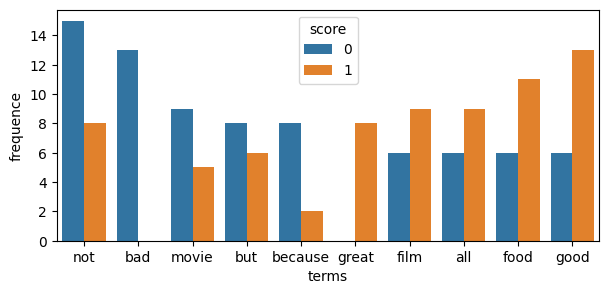

In [72]:
id_0_1=max_freq_id_update_0[:5]+max_freq_id_update_1[4::-1]
name=count_vect.get_feature_names_out()[id_0_1].tolist()
display(name)
dfs = pd.DataFrame(data={'terms': name+name, 'frequence': term_freq_0[id_0_1].tolist()+term_freq_1[id_0_1].tolist(),'score':[0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1] })
plt.subplots(figsize=(7, 3))
sns.barplot(x='terms', y='frequence', hue='score', data=dfs)
plt.show()

###Tf-IDF

In [73]:
tv=TfidfVectorizer(stop_words=stopword2)
tv_fit=tv.fit_transform(total_data.text)
print("the words:",tv.get_feature_names_out())
display(tv_fit.toarray())

the words: ['00' '10' '100' ... 'zillion' 'zombie' 'zombiez']


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

###Naive Bayes classifier

In [74]:
indexes = sample_data.id_org.tolist()
testdata_id = np.delete(np.array(range(0,len(total_data))), indexes)
len_pred=len(testdata_id)
ans_score=total_data.loc[testdata_id].score.tolist()
ans_label=total_data.loc[testdata_id].label.tolist()

####TF-IDF features

In [75]:
tv=TfidfVectorizer(stop_words=stopword2)
tv_fit=tv.fit_transform(sample_data.text)
x=tv_fit.toarray()

In [76]:
y=sample_data["score"].array
mnb = MultinomialNB()
mnb.fit(x, y)
pred_score=mnb.predict(tv.transform(total_data.loc[testdata_id].text))
pred_wrong_s=[i for i in range(len_pred) if pred_score[i]!=ans_score[i]]
print("TF_IDF_score_acc:", (len_pred-len(pred_wrong_s))/len_pred)

TF_IDF_score_acc: 0.6984246061515379


In [77]:
y=sample_data["label"].array
mnb = MultinomialNB()
mnb.fit(x, y)
pred_label=mnb.predict(tv.transform(total_data.loc[testdata_id].text))
pred_wrong_l=[i for i in range(len_pred) if pred_label[i]!=ans_label[i]]
print("TF_IDF_label_acc:", (len_pred-len(pred_wrong_l))/len_pred)

TF_IDF_label_acc: 0.6946736684171043


####word frequency features

In [78]:
count_vect = CountVectorizer()
sample_counts = count_vect.fit_transform(sample_data.text) #learn the vocabulary and return document-term matrix
x=sample_counts

In [79]:
y=sample_data["score"].array
mnb = MultinomialNB()
mnb.fit(x, y)
pred=mnb.predict(count_vect.transform(total_data.loc[testdata_id].text))
pred_wrong_s=[i for i in range(len_pred) if pred[i]!=ans_score[i]]
print("acc:", (len_pred-len(pred_wrong_s))/len_pred)

acc: 0.6939234808702176


In [80]:
y=sample_data["label"].array
mnb = MultinomialNB()
mnb.fit(x, y)
pred=mnb.predict(count_vect.transform(total_data.loc[testdata_id].text))
pred_wrong_l=[i for i in range(len_pred) if pred[i]!=ans_label[i]]
print("acc:", (len_pred-len(pred_wrong_l))/len_pred)

acc: 0.7220555138784697


####compare plot

In [81]:
train_frac=[0.1, 0.3, 0.5, 0.7, 0.9]
seed=[23,46,67]
feature=["tfidf","freq"]
classifier=["score","label"]

In [82]:
acc_rec=[]
acc_score_0=[]
acc_score_1=[]
acc_label_1=[]
acc_label_2=[]
acc_label_3=[]
for f in train_frac:
  for s in seed:
    train = total_data.sample(frac=f,random_state=s).reset_index(names=['id_org'])
    test = total_data.drop(train.id_org)
    len_pred=len(test)
    n=len(train)
    #ans
    ans_score=test.score.tolist()
    ans_label=test.label.tolist()
    for feat in feature:
      if feat=="tfidf": #tf-idf
        model_vec=TfidfVectorizer(stop_words=stopword2)
        x = model_vec.fit_transform(train.text).toarray()
      elif feat=="freq": #word_frequency
        model_vec = CountVectorizer()
        x = model_vec.fit_transform(train.text)
      #score
      y=train["score"].array
      mnb = MultinomialNB()
      mnb.fit(x, y)
      pred=mnb.predict(model_vec.transform(test.text))
      correct=[a for p,a in zip(pred,ans_score) if p==a]
      #print("train_num:",n ,feat,"_score_acc:", acc/len_pred)
      acc_rec.append(len(correct)/len_pred)
      acc_score_0.append(correct.count(0)/ans_score.count(0))
      acc_score_1.append(correct.count(1)/ans_score.count(1))
      #label
      y=train["label"].array
      mnb = MultinomialNB()
      mnb.fit(x, y)
      pred=mnb.predict(model_vec.transform(test.text))
      correct=[a for p,a in zip(pred,ans_label) if p==a]
      acc_rec.append(len(correct)/len_pred)
      acc_label_1.append(correct.count(1)/ans_label.count(1))
      acc_label_2.append(correct.count(2)/ans_label.count(2))
      acc_label_3.append(correct.count(3)/ans_label.count(3))

,frac,state,feature,class_name,acc
0,0.1,23,tfidf,score,0.704758
17,0.3,46,tfidf,label,0.801541
34,0.5,67,freq,score,0.797033
51,0.9,23,freq,label,0.905724


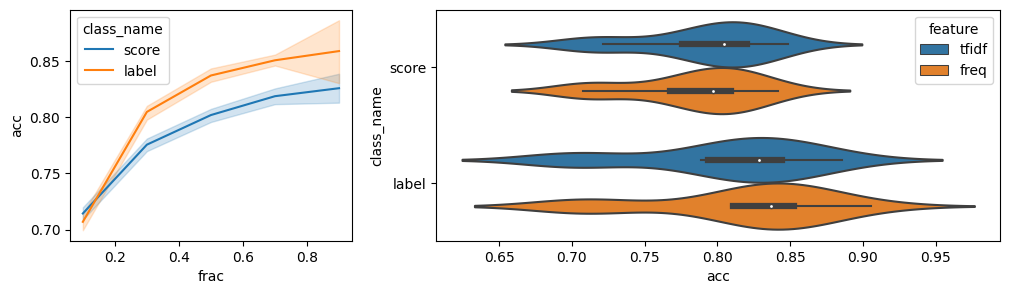

In [83]:
#create acc dataframe
df=[]
for f in train_frac:
  for s in seed:
    for feat in feature:
      for c in classifier:
        df.append([f,str(s),feat,c])
acc_data = pd.DataFrame(df, columns=["frac","state","feature","class_name"])
acc_data["acc"]=acc_rec
display(acc_data[::17])
#plot
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12, 3), gridspec_kw={"width_ratios": [1, 2]})
sns.lineplot(x='frac', y='acc', hue='class_name', data=acc_data, ax=ax1)
sns.violinplot(x='acc', y='class_name', hue='feature', data=acc_data, ax=ax2);

小結論：在樣本數低的情況，score 比較容易辨識，但隨著 frac 提升，label 的辨識率正確率明顯比 score 更高。tfidf 在 score 的辨識中，比 word frequency 的效果更好，但在 label 辨識中正好相反。

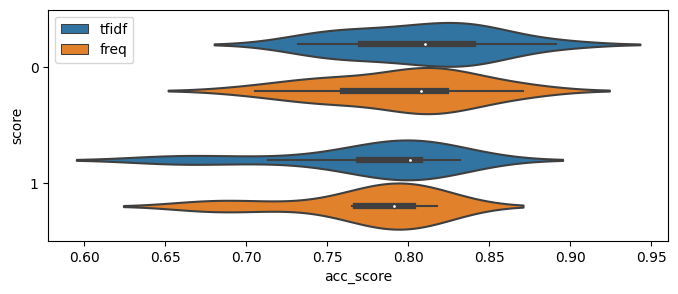

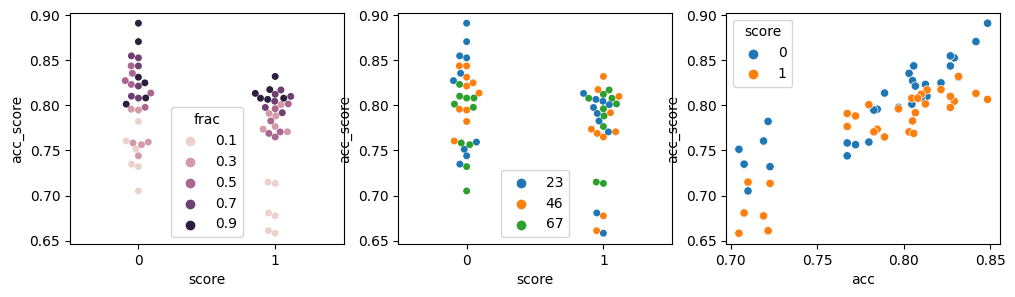

In [84]:
#create the accuracy of score dataframe
acc_score = acc_data.loc[acc_data['class_name']=="score",["frac","state","feature","acc"]]
acc_score = pd.concat([acc_score, acc_score])
acc_score["score"]=['0']*30+['1']*30
acc_score['acc_score']=acc_score_0+acc_score_1
#plot
plt.figure(figsize=(8,3))
sns.violinplot(x='acc_score', y='score', hue="feature", data=acc_score, legend=False);
plt.legend(loc="upper left")

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12, 3), gridspec_kw={"width_ratios": [1,1,1]}, sharey=False)
sns.swarmplot(x='score', y='acc_score', hue="frac", data=acc_score, ax=ax1)
sns.swarmplot(x='score', y='acc_score', hue="state", data=acc_score, ax=ax2, legend=True)
sns.scatterplot(x='acc', y='acc_score', hue="score", data=acc_score, ax=ax3, legend=True)
ax2.legend(loc="lower center")

1被誤判的機率比0高很多。隨著sample的frac上升，正確率逐漸提高。

,frac,state,feature,acc,label,acc_label
1,0.1,23,tfidf,0.693518,yelp,0.792090
39,0.7,23,freq,0.853933,yelp,0.882353
17,0.3,46,tfidf,0.801541,imdb,0.861152
55,0.9,46,freq,0.828283,imdb,0.838710
33,0.5,67,tfidf,0.830074,amazon_cells,0.845041


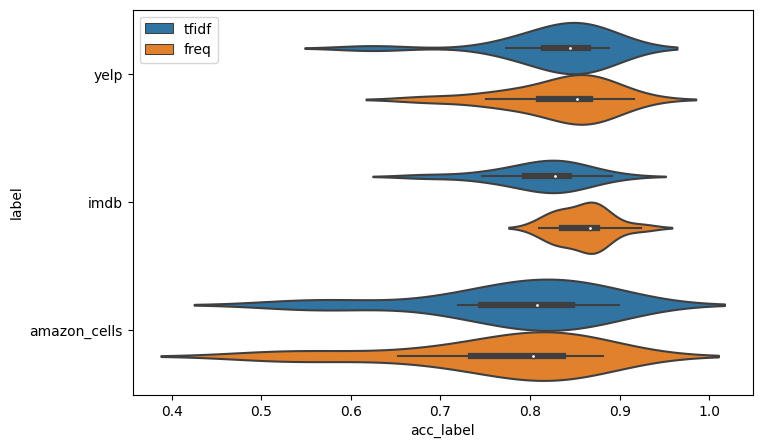

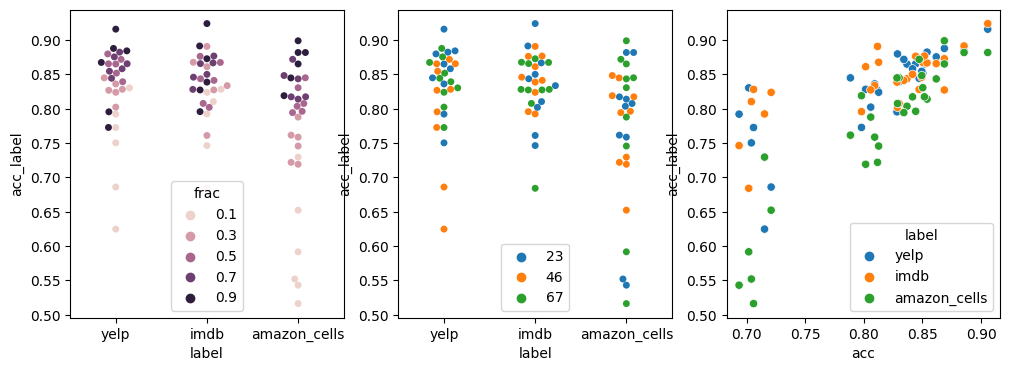

In [85]:
#create the accuracy of label dataframe
acc_label = acc_data.loc[acc_data['class_name']=="label",["frac","state","feature","acc"]]
acc_label = pd.concat([acc_label, acc_label, acc_label])
acc_label["label"]=['yelp']*30+['imdb']*30+['amazon_cells']*30
acc_label["acc_label"]=acc_label_1+acc_label_2+acc_label_3
display(acc_label.iloc[::19])
#plot
plt.figure(figsize=(8,5))
sns.violinplot(x='acc_label', y='label', hue='feature', data=acc_label);
plt.legend(loc="upper left")

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12, 4), gridspec_kw={"width_ratios": [1,1,1]}, sharey=False)
sns.swarmplot(x='label', y='acc_label', hue="frac", data=acc_label, ax=ax1)
sns.swarmplot(x='label', y='acc_label', hue="state", data=acc_label, ax=ax2, legend=True)
sns.scatterplot(x='acc', y='acc_label', hue="label", data=acc_label, ax=ax3, legend=True)
ax2.legend(loc="lower center")


amazon_cells的誤判率最高，imdb 的誤判率最低。隨著sample的frac上升，以及總準確率(acc)的上升，每個label的正確率都有提高。

##part4

Label(the numer represent yelp, imdb, amazon_cells) is useless, it can be replaced by label_name. bin_label doesn't be used in any plot and analysis.

Because bag of words is sparse matrix, subset selection by random 10 documents is ineffectient, most of them are 0s. It can be replaced by sum of the some doucuments(not only one document) be a new document, the frequence will be more meaningful.  

There are some outliers in the plot of 2D or 3D dimension, which makes other points too concentrated.

---